[*********************100%***********************]  1 of 1 completed
>>>>> CXSE3.SA <<<<<


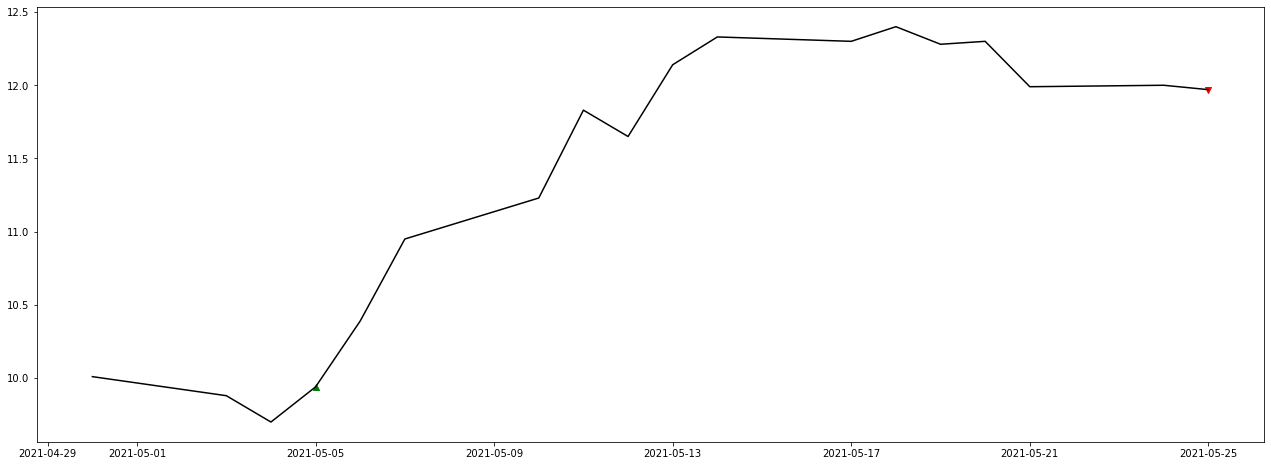

[*********************100%***********************]  1 of 1 completed
>>>>> OIBR3.SA <<<<<


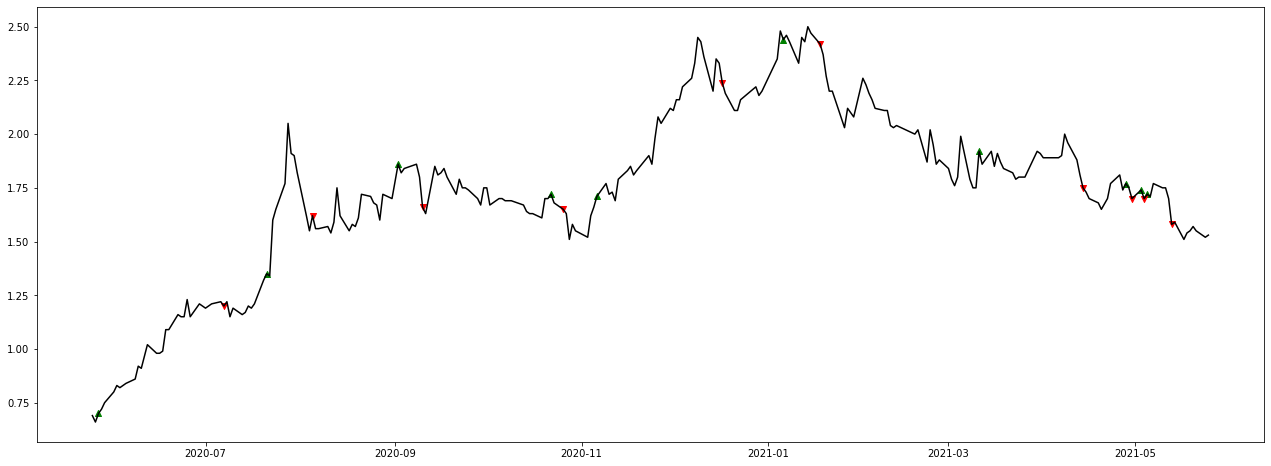

[*********************100%***********************]  1 of 1 completed
>>>>> BRFS3.SA <<<<<


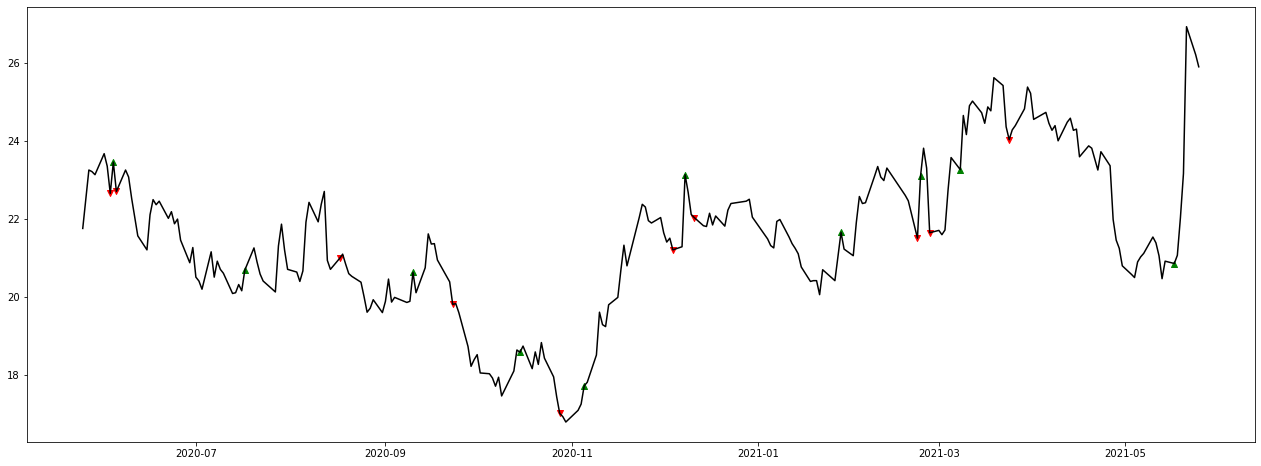

[*********************100%***********************]  1 of 1 completed
>>>>> ITUB4.SA <<<<<


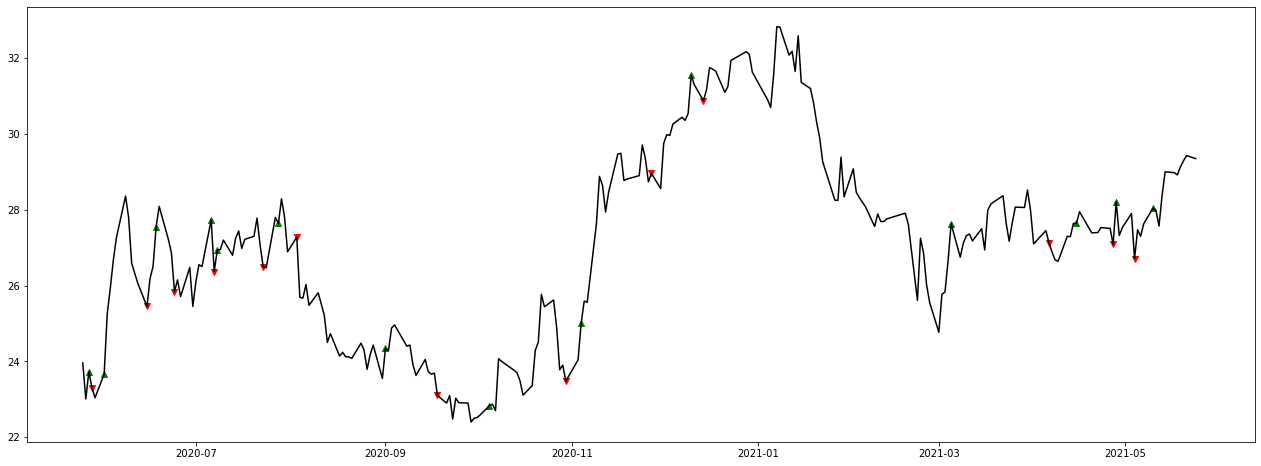

[*********************100%***********************]  1 of 1 completed
>>>>> CIEL3.SA <<<<<


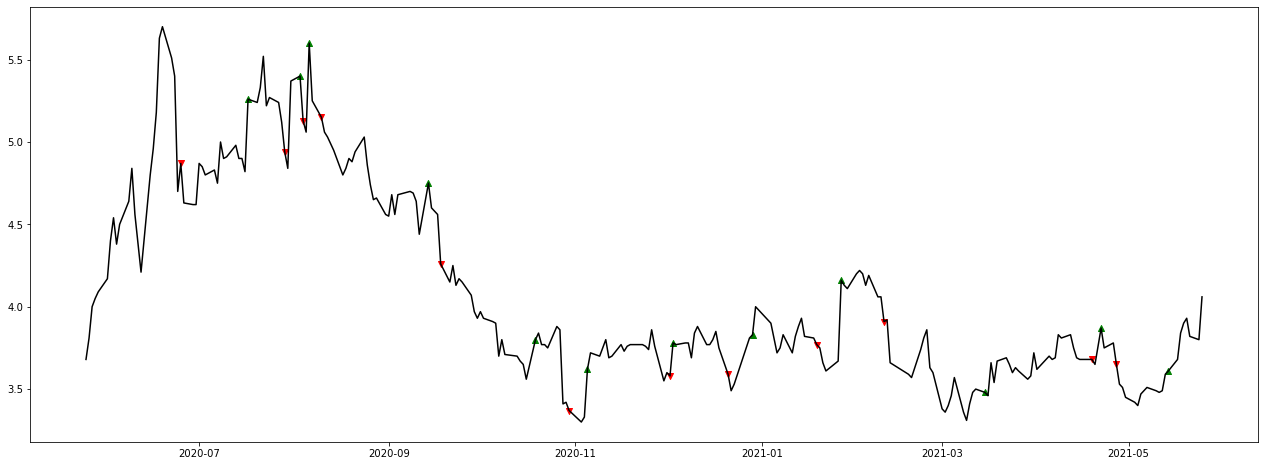

[*********************100%***********************]  1 of 1 completed
>>>>> GOAU4.SA <<<<<


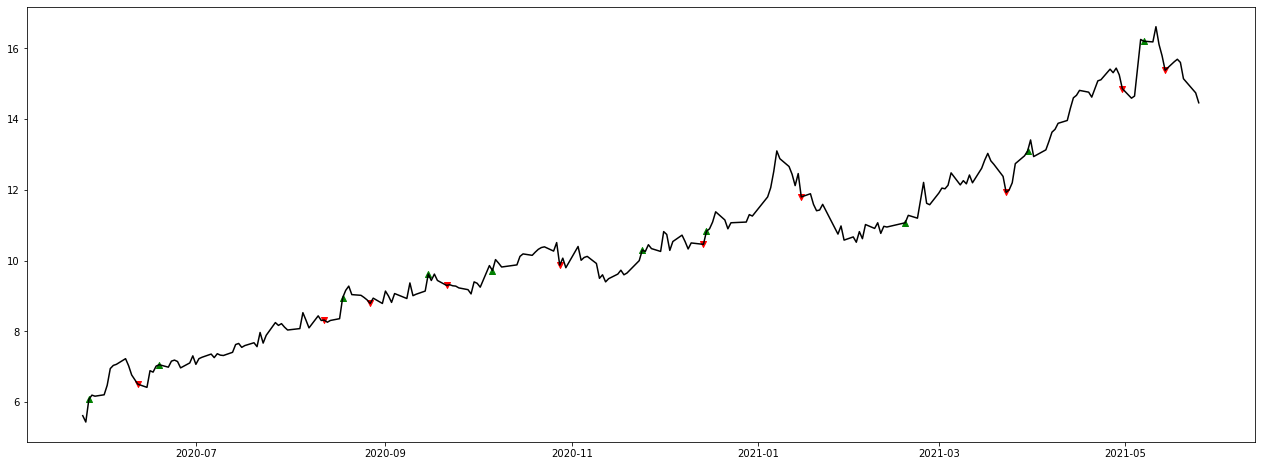

[*********************100%***********************]  1 of 1 completed
>>>>> VALE3.SA <<<<<


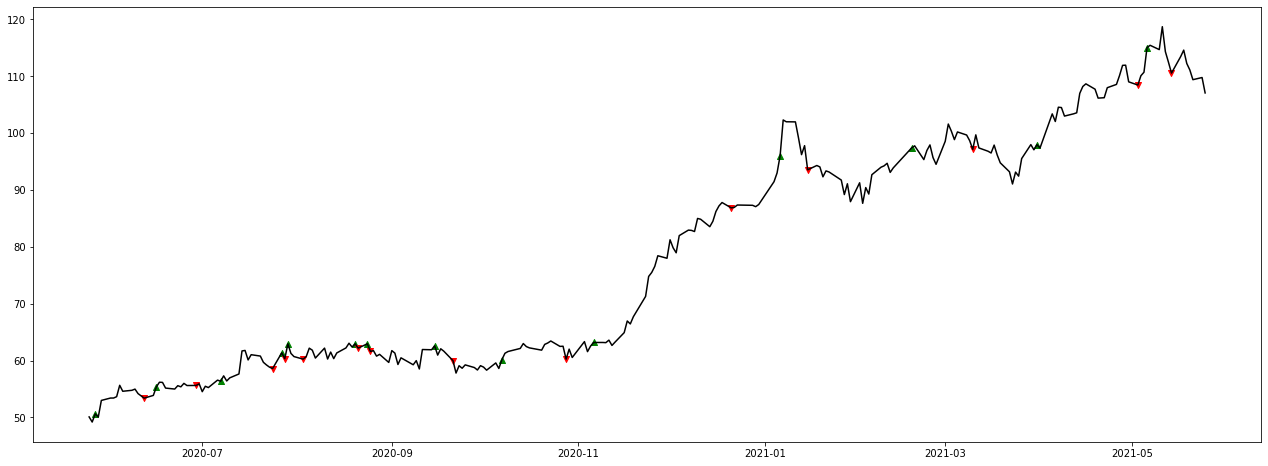

[*********************100%***********************]  1 of 1 completed
>>>>> EMBR3.SA <<<<<


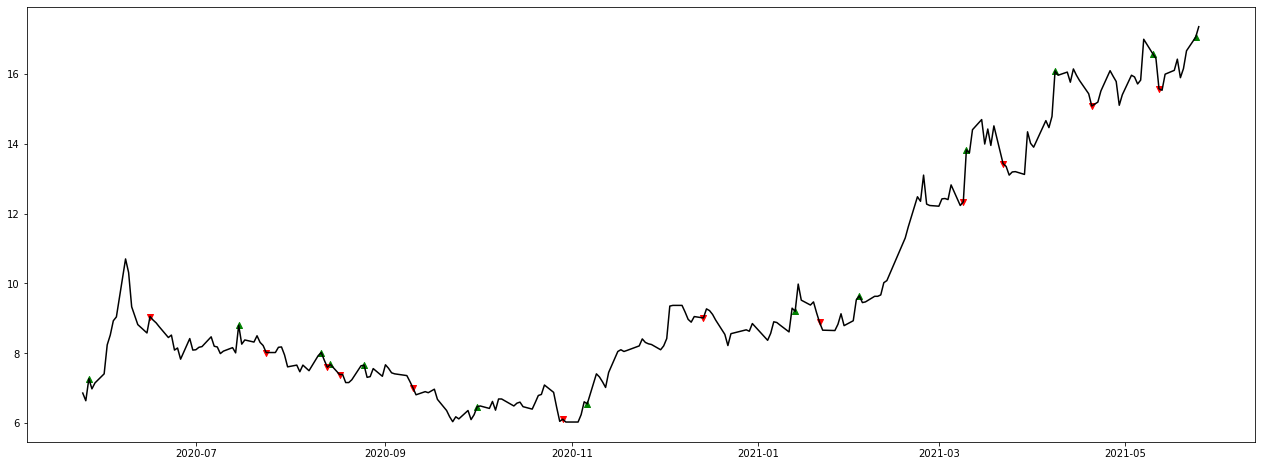

[*********************100%***********************]  1 of 1 completed
>>>>> PETR4.SA <<<<<


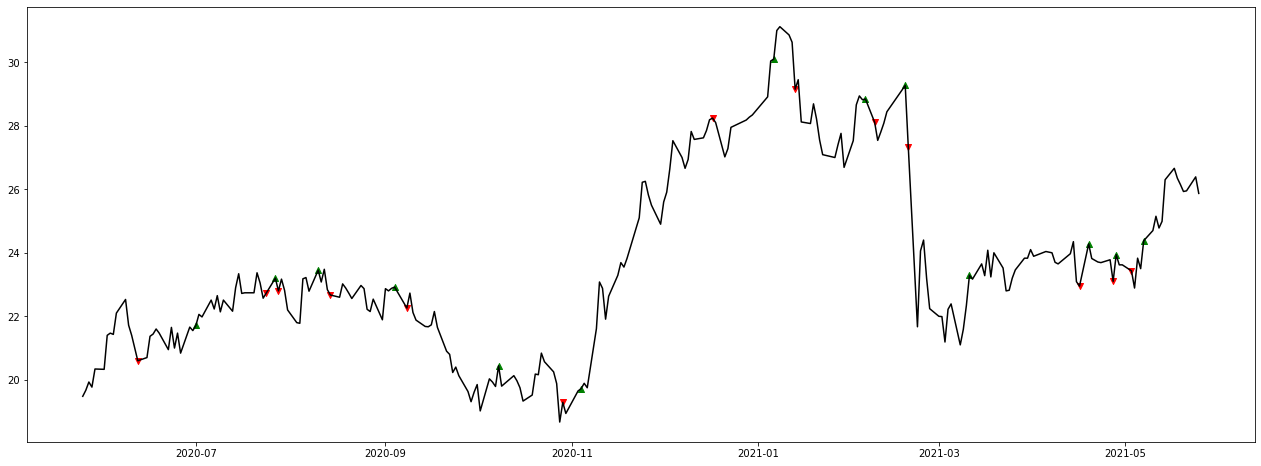

[*********************100%***********************]  1 of 1 completed
>>>>> PGMN3.SA <<<<<


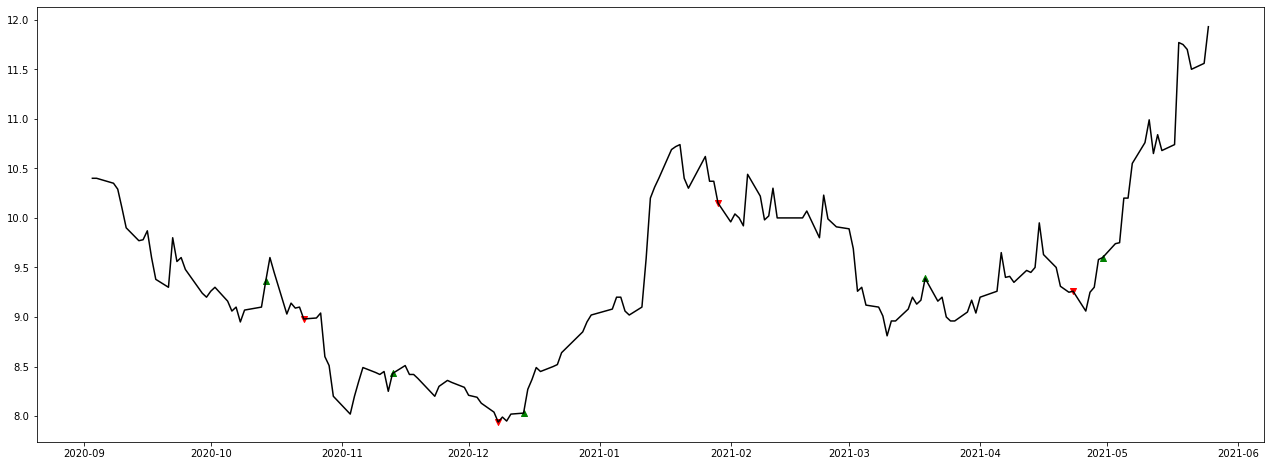

[*********************100%***********************]  1 of 1 completed
>>>>> VIVR3.SA <<<<<


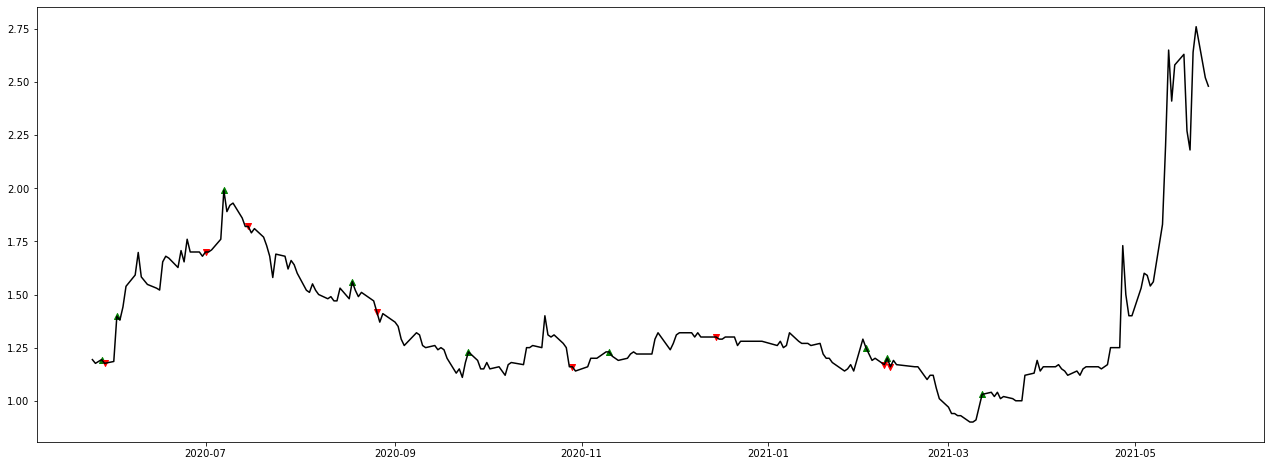

[*********************100%***********************]  1 of 1 completed
>>>>> BRML3.SA <<<<<


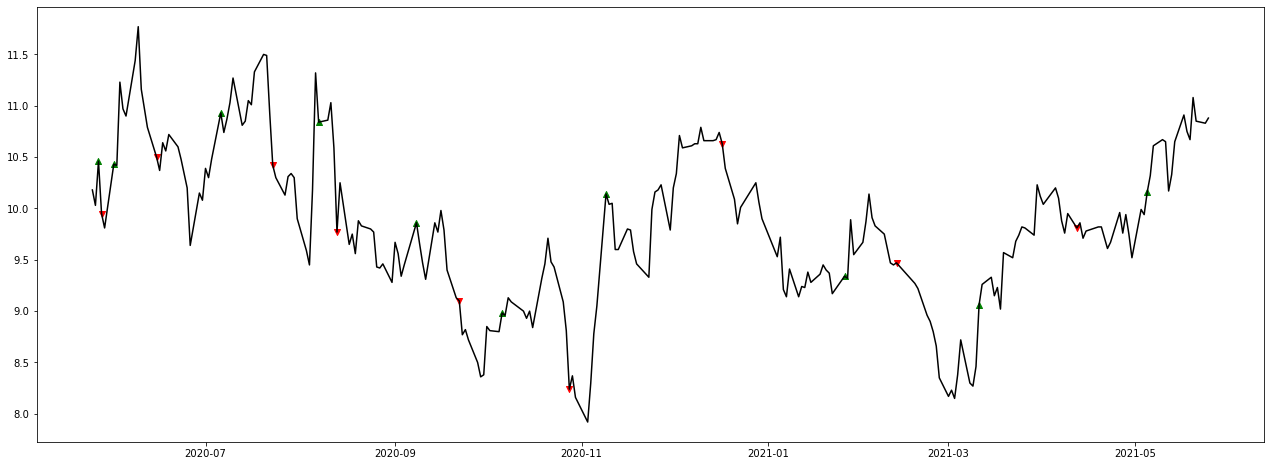

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = [
    'CXSE3.SA',
    'OIBR3.SA',
    'BRFS3.SA',
    'ITUB4.SA',
    'CIEL3.SA',
    'GOAU4.SA',
    'VALE3.SA',
    'EMBR3.SA',
    'PETR4.SA',
    'PGMN3.SA',
    'VIVR3.SA',
    'BRML3.SA'
] 


for i in ticker:
    df = yf.download(i, period='1y')
    df['EMA12'] = df.Close.ewm(span=12).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=9).mean()
    print(f'>>>>> {i} <<<<<')

    Buy, Sell = [], []

    for i in range(2,len(df)):
        if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
            Buy.append(i)
        elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
            Sell.append(i)

    plt.figure(figsize=(22,8))
    plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker="^", color='green')
    plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker="v", color='red')
    plt.plot(df.Close, label=i, color='k')
    #plt.legend()
    plt.show()